## Final Project Submission

Please fill out:
* Student name: Jeptoo Nightingale
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


## PROJECT OVERVIEW

The project involves using data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.


## BUSINESS PROBLEM

The business problem is that the company is expanding into new industries, specifically purchasing and operating airplanes for commercial and private enterprises, but does not know anything about the potential risks of aircraft.



## DATA

In the `data` folder is a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### KEY POINTS

The goal is to determine which aircraft are the lowest risk for the company to start this new business endeavor.
The findings must be translated into actionable insights for the head of the new aviation division to help decide which aircraft to purchase.

1.# Import the Relevant Library'
In the cell below import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## 2.1 Load the Data
Load the file "Aviation_Data.csv" as a DataFrame in pandas.
Use pandas to create a new DataFrame, called `df`, containing the data from the dataset in the file `Aviation_Data' in the folder containing this notebook.
Hint: Use the string './Aviation_Data.csv'as the file reference

In [2]:
#load the data

Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')


## 2.2 Exploring the data

### Understand the dataset's structure

In [3]:
#display data set
Aviation_Data.info()
  # Display the first 5 rows of the dataset
Aviation_Data.head(5)  # Display the first 5 rows of the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#see number of rows and columns
Aviation_Data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# See column names
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### 3 Handling Missing Data and Data cleaning

In [6]:

#check for duplicates
Aviation_Data.duplicated().sum()

1390

In [7]:
#check for missing values
Aviation_Data.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [8]:
#columns to drop
cols_to_drop = ['Airport.Code', 'FAR.Description', 'Schedule', 'Air.carrier', 'Latitude', 'Longitude',
    'Airport.Name', 'Investigation.Type', 'Publication.Date', 'Report.Status','unknown']



In [9]:
cols_to_drop = [col for col in cols_to_drop if col in Aviation_Data.columns]
Aviation_Data= Aviation_Data.drop(columns=cols_to_drop)
Aviation_Data.shape

(90348, 21)

In [10]:
#Removing Duplicates
Aviation_Data = Aviation_Data.drop_duplicates()
Aviation_Data.shape

(88890, 21)

##### Fix inconsistent text capitalization, stripping spaces


In [11]:
#stripping whitespace from column names
Aviation_Data.columns = Aviation_Data.columns.str.strip()
# Renaming columns to remove spaces and special characters
Aviation_Data.columns = Aviation_Data.columns.str.replace(' ', '_').str.replace('.', '_').str.replace('-', '_').str.replace('/', '_')

In [12]:
# Convert date to datetime format
Aviation_Data['Event_Date'] = pd.to_datetime(Aviation_Data['Event_Date'], errors='coerce')


## EXPLORATORY DATA ANALYSIS

In [13]:
# Quick statistics for numerical columns
Aviation_Data.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [14]:
#Correlation matrix
corr = Aviation_Data.corr()
corr

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
Number_of_Engines,1.000000,0.098505,0.046157,0.098162,0.406058
Total_Fatal_Injuries,0.098505,1.000000,0.135724,0.073559,-0.015214
Total_Serious_Injuries,0.046157,0.135724,1.000000,0.326849,0.052869
Total_Minor_Injuries,0.098162,0.073559,0.326849,1.000000,0.147770
Total_Uninjured,0.406058,-0.015214,0.052869,0.147770,1.000000


### Plot distribution of accident dates


#### Plot the number of accidents over time to see if there are any trends or patterns.

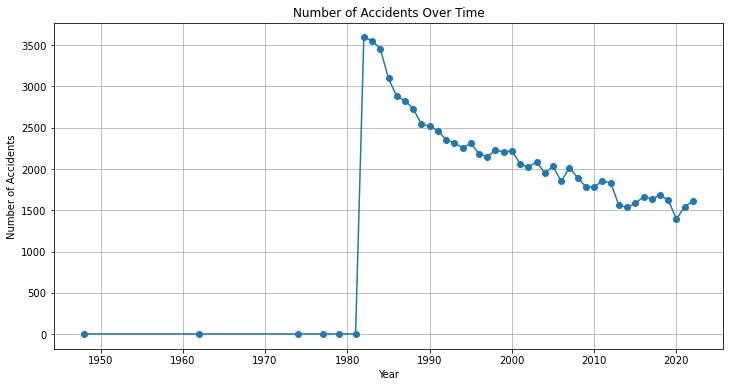

In [15]:

# Time-based analysis
if 'Event_Date' in Aviation_Data.columns: # Check if the column exists
    # Aggregate by year
    accidents_by_year = Aviation_Data.groupby(Aviation_Data['Event_Date'].dt.year).size()

    plt.figure(figsize=(12, 6))
    accidents_by_year.plot(kind='line', marker='o')
    plt.title('Number of Accidents Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.show()

##### In summary, the graph suggests a period of relatively few accidents in the earlier years of the dataset, followed by a significant surge around 1980. Subsequently, there's a general decline in the number of accidents over time, stabilizing at a lower level in the later part of the period, with a recent minor increase.

### Pie chart displaying The top 10 states with most Accidents

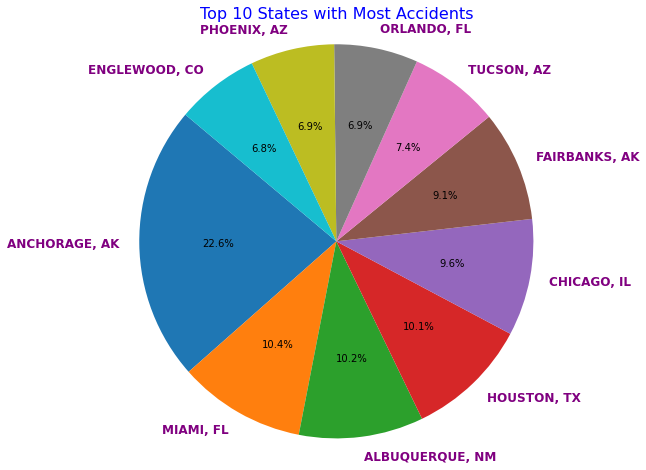

In [16]:
import matplotlib.pyplot as plt
if 'Location' in Aviation_Data.columns:
    top_states = Aviation_Data['Location'].value_counts().head(10)

    plt.figure(figsize=(10, 8))
    patches, texts, autotexts = plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 States with Most Accidents', color='blue', fontsize=16)  # Title formatting
    plt.axis('equal')

    # Customize the 'Location' labels (state names)
    for text in texts:
        text.set_color('purple')  # Color of the labels
        text.set_fontsize(12)     # Font size of the labels
        text.set_fontweight('bold') # Font weight (e.g., 'bold', 'normal')
    
    plt.show()


 ### In summary, this pie chart clearly shows that Anchorage, Alaska, accounts for the largest share of accidents among the top 10 locations in the Aviation Dataset. Several other major cities or states also contribute significantly. The largest slice of the pie chart, representing 22.6%, belongs to ANCHORAGE, AK. This indicates that Anchorage, Alaska, has the highest proportion of accidents among the top 10 locations

In [17]:
#check for column names
print(Aviation_Data.columns.tolist())



['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category', 'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Broad_phase_of_flight']


In [18]:
### Bar Chart displaying the number of accidents by aircraft make

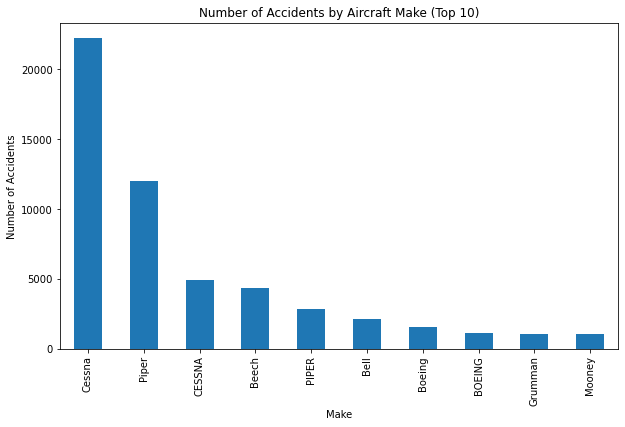

In [19]:
Aviation_Data

aircraft_type_counts = Aviation_Data['Make'].value_counts().head(10) # Top 10
plt.figure(figsize=(10, 6))
aircraft_type_counts.plot(kind='bar')
plt.title('Number of Accidents by Aircraft Make (Top 10)')
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.show()

In summary the bar chart displays the number of accidents for the top 10 aircraft makes. It looks like Cessna aircraft have been involved in significantly more accidents than any other make shown here. Piper is the second highest, with a much lower number of accidents compared to Cessna.

The remaining aircraft makes, including BEECH, BELL, BOEING, GRUMMAN, and MOONEY, all have a considerably lower number of recorded accidents in this dataset.


In [ ]:
## RECOMMENDATIONS
# 1. **Data Quality Improvement**: Ensure that the dataset is regularly updated and cleaned to maintain accuracy.
# 2. **Safety Protocols**: Airlines should review and enhance safety protocols based on the findings from the analysis.